# Analysing the data

In this notebook, I will analize the processed data. 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme(style='whitegrid')

In [3]:
data = pd.read_csv('../data/processed_data/processed_data.csv')

In [5]:
data.head()

,Unnamed: 0,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,0,1,417380,A,75.0,0,1,2017-01-01,2017,1,1,1,0,0,1,1.0,1.0,1.0,0.0,1.0
1,1,2,999001,A,NaN,1,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN,NaN
2,2,3,417740,A,76.0,0,1,2017-01-01,2017,1,1,1,0,0,1,2.0,1.0,0.0,0.0,1.0
3,3,4,999001,A,NaN,1,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN,NaN
4,4,5,417740,A,NaN,1,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1335576 non-null  int64  
 1   dim_claim_id             1335576 non-null  int64  
 2   bin                      1335576 non-null  int64  
 3   drug                     1335576 non-null  object 
 4   reject_code              555951 non-null   float64
 5   pharmacy_claim_approved  1335576 non-null  int64  
 6   dim_date_id              1335576 non-null  int64  
 7   date_val                 1335576 non-null  object 
 8   calendar_year            1335576 non-null  int64  
 9   calendar_month           1335576 non-null  int64  
 10  calendar_day             1335576 non-null  int64  
 11  day_of_week              1335576 non-null  int64  
 12  is_weekday               1335576 non-null  int64  
 13  is_workday               1335576 non-null 

In [7]:
data.describe()

,Unnamed: 0,dim_claim_id,bin,reject_code,pharmacy_claim_approved,dim_date_id,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
count,1.335576e+06,1.335576e+06,1.335576e+06,555951.000000,1.335576e+06,1.335576e+06,1.335576e+06,1.335576e+06,1.335576e+06,1.335576e+06,1.335576e+06,1.335576e+06,1.335576e+06,555951.00000,555951.000000,555951.00000,555951.000000,555951.000000
mean,6.677875e+05,6.677885e+05,6.965231e+05,72.887159,5.837369e-01,5.749331e+02,2.018083e+03,6.419265e+00,1.574646e+01,4.021111e+00,8.781567e-01,8.644061e-01,8.186730e-03,277976.00000,0.799819,0.50076,0.200802,0.734451
std,3.855477e+05,3.855477e+05,2.904649e+05,2.651888,4.929384e-01,3.117302e+02,8.073485e-01,3.454709e+00,8.746991e+00,1.671668e+00,3.271049e-01,3.423570e-01,9.010945e-02,160489.37409,0.400136,0.50000,0.400601,0.441625
min,0.000000e+00,1.000000e+00,4.173800e+05,70.000000,0.000000e+00,1.000000e+00,2.017000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00000,0.000000,0.00000,0.000000,0.000000
25%,3.338938e+05,3.338948e+05,4.176140e+05,70.000000,0.000000e+00,3.170000e+02,2.017000e+03,3.000000e+00,8.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,138988.50000,1.000000,0.00000,0.000000,0.000000
50%,6.677875e+05,6.677885e+05,4.177400e+05,75.000000,1.000000e+00,5.890000e+02,2.018000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,277976.00000,1.000000,1.00000,0.000000,1.000000
75%,1.001681e+06,1.001682e+06,9.990010e+05,75.000000,1.000000e+00,8.420000e+02,2.019000e+03,9.000000e+00,2.300000e+01,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,416963.50000,1.000000,1.00000,0.000000,1.000000
max,1.335575e+06,1.335576e+06,9.990010e+05,76.000000,1.000000e+00,1.095000e+03,2.019000e+03,1.200000e+01,3.100000e+01,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,555951.00000,1.000000,1.00000,1.000000,1.000000


In [8]:
data['drug'].unique()

array(['A', 'B', 'C'], dtype=object)

Which reject code appeared most?

In [9]:
data['reject_code'].value_counts()

70.0    252206
75.0    217351
76.0     86394
Name: reject_code, dtype: int64

So the reject code 70.0 appeared most (252206 times), and the reject code 70.0 implies that a drug is not covered by the plan and is not on formulary, and typically implies that another course of therapy should be pursued.

Rejection rate? 

The "pharmacy_claim_approved" column tells if the claim is approved or rejected. 1 means approved, 0 means rejected. 

In [4]:
data['pharmacy_claim_approved'].value_counts()[0]/data['pharmacy_claim_approved'].value_counts().sum()

0.4162630954734137

So the rejection rate is 41.6263%. What is the percentage of the rejection with rejection code 75?

In [5]:
data['pharmacy_claim_approved'].value_counts()[1]/data['pharmacy_claim_approved'].value_counts().sum()

0.5837369045265863

So the approval rate is 58.3737%. If we choose our baseline model to predict all claims to be approved, it has accuracy of 58.3737%.

In [11]:
data['reject_code'].value_counts()[75]/data['pharmacy_claim_approved'].value_counts().sum()

0.16273952212378778

So 16.2739% of claims are rejected with rejection code 75. CoverMyMeds uses ePA to prevent rejection with rejection code 75 (PA is required). So it can reduce rejection rate up to 16.2739%. 

<AxesSubplot:xlabel='drug', ylabel='Count'>

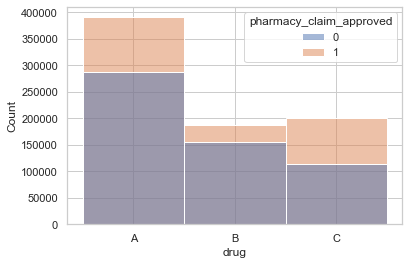

In [12]:
sns.histplot(data=data,x='drug',hue='pharmacy_claim_approved')

<AxesSubplot:xlabel='calendar_month', ylabel='Count'>

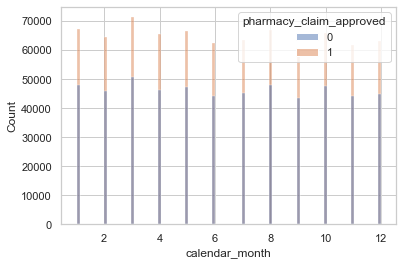

In [13]:
sns.histplot(data=data,x='calendar_month',hue='pharmacy_claim_approved')

<AxesSubplot:xlabel='calendar_month', ylabel='Count'>

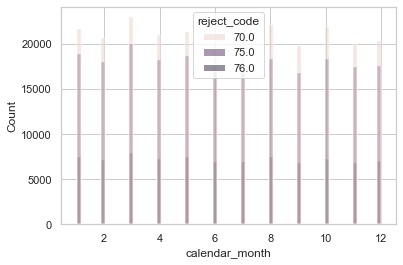

In [14]:
sns.histplot(data=data,x='calendar_month',hue='reject_code')

In [23]:
data['date_val']

0          2017-01-01
1          2017-01-01
2          2017-01-01
3          2017-01-01
4          2017-01-01
              ...    
1335571    2019-12-31
1335572    2019-12-31
1335573    2019-12-31
1335574    2019-12-31
1335575    2019-12-31
Name: date_val, Length: 1335576, dtype: object

In [43]:
data['calendar_year'].unique()

array([2017, 2018, 2019])

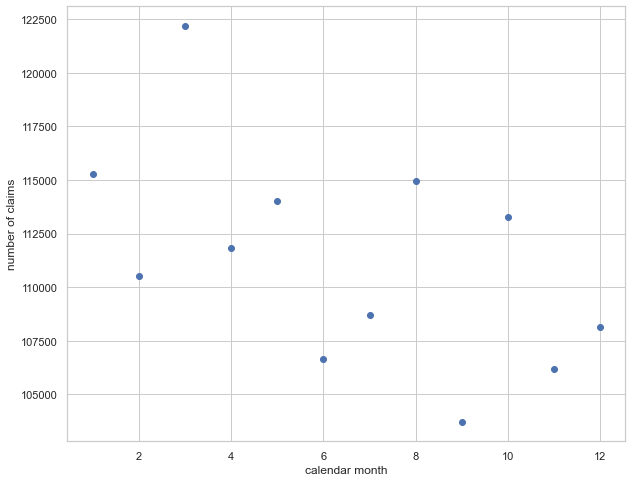

In [15]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(10,8))

plt.scatter(months, data['calendar_month'].value_counts()[months])

plt.xlabel("calendar month") 
plt.ylabel("number of claims")

plt.show()

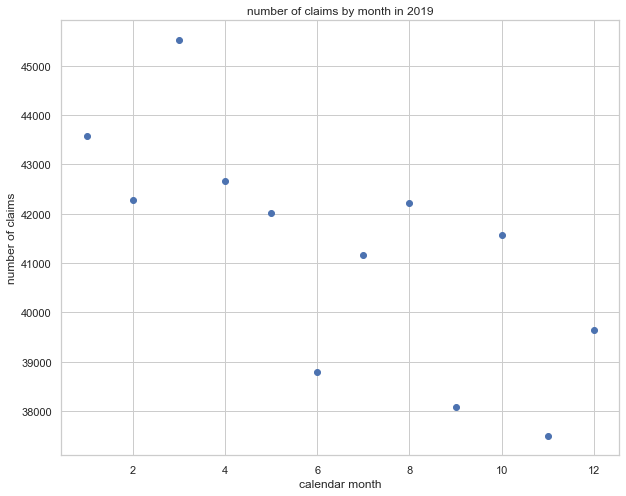

In [16]:

plt.figure(figsize=(10,8))

plt.scatter(months, data[data['calendar_year']==2019]['calendar_month'].value_counts()[months])

plt.xlabel("calendar month") 
plt.ylabel("number of claims")

plt.title("number of claims by month in 2019")

plt.show()

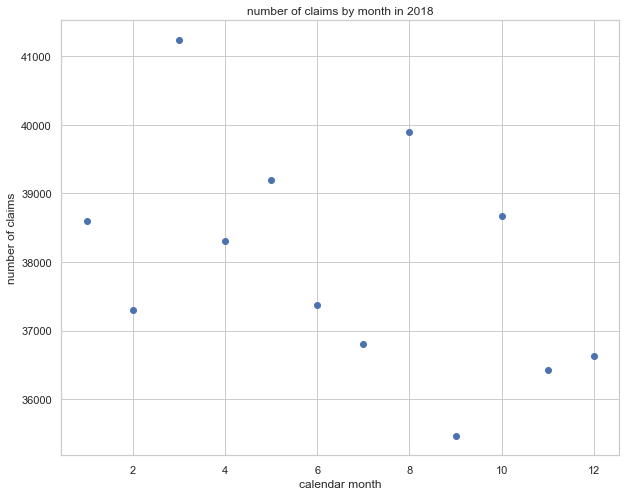

In [17]:
plt.figure(figsize=(10,8))

plt.scatter(months, data[data['calendar_year']==2018]['calendar_month'].value_counts()[months])

plt.xlabel("calendar month") 
plt.ylabel("number of claims")

plt.title("number of claims by month in 2018")

plt.show()

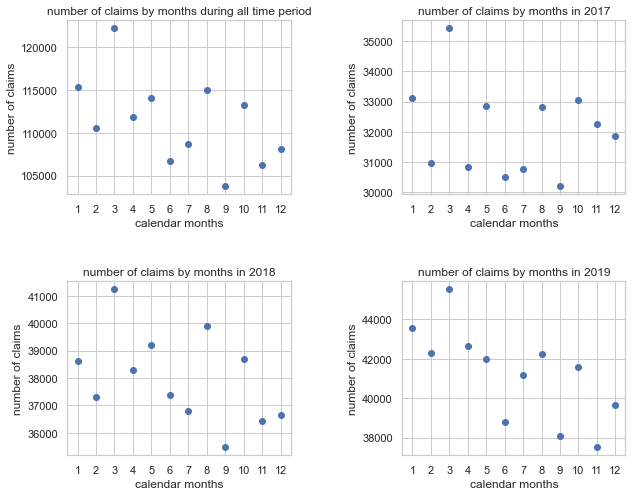

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8)) 

axes[0,0].scatter(months, data['calendar_month'].value_counts()[months])
axes[0,0].set_title('number of claims by months during all time period')
axes[0,0].set_xlabel('calendar months')
axes[0,0].set_ylabel('number of claims')
axes[0,0].set_xticks(months)

axes[0,1].scatter(months, data[data['calendar_year']==2017]['calendar_month'].value_counts()[months])
axes[0,1].set_title('number of claims by months in 2017')
axes[0,1].set_xlabel('calendar months')
axes[0,1].set_ylabel('number of claims')
axes[0,1].set_xticks(months)

axes[1,0].scatter(months, data[data['calendar_year']==2018]['calendar_month'].value_counts()[months])
axes[1,0].set_title('number of claims by months in 2018')
axes[1,0].set_xlabel('calendar months')
axes[1,0].set_ylabel('number of claims')
axes[1,0].set_xticks(months)

axes[1,1].scatter(months, data[data['calendar_year']==2019]['calendar_month'].value_counts()[months]) 
axes[1,1].set_title('number of claims by months in 2019')
axes[1,1].set_xlabel('calendar months')
axes[1,1].set_ylabel('number of claims')
axes[1,1].set_xticks(months)

fig.subplots_adjust(left=None, right=None, top=None, bottom=None, wspace=0.5, hspace=0.5)

plt.show()


The highest number of claims occurs in March.

In [19]:
from datetime import datetime

In [20]:
pd.to_datetime(data['date_val'])

0         2017-01-01
1         2017-01-01
2         2017-01-01
3         2017-01-01
4         2017-01-01
             ...    
1335571   2019-12-31
1335572   2019-12-31
1335573   2019-12-31
1335574   2019-12-31
1335575   2019-12-31
Name: date_val, Length: 1335576, dtype: datetime64[ns]

In [21]:
data['DATE'] = pd.to_datetime(data['date_val'])

In [22]:
data['DATE']

0         2017-01-01
1         2017-01-01
2         2017-01-01
3         2017-01-01
4         2017-01-01
             ...    
1335571   2019-12-31
1335572   2019-12-31
1335573   2019-12-31
1335574   2019-12-31
1335575   2019-12-31
Name: DATE, Length: 1335576, dtype: datetime64[ns]

In [54]:
data.sort_values(by='DATE')

,Unnamed: 0,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,dim_date_id,date_val,calendar_year,calendar_month,...,day_of_week,is_weekday,is_workday,is_holiday,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,DATE
0,0,1,417380,A,75.0,0,1,2017-01-01,2017,1,...,1,0,0,1,1.0,1.0,1.0,0.0,1.0,2017-01-01
142,142,143,999001,B,NaN,1,1,2017-01-01,2017,1,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,2017-01-01
143,143,144,999001,B,NaN,1,1,2017-01-01,2017,1,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,2017-01-01
144,144,145,999001,B,NaN,1,1,2017-01-01,2017,1,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,2017-01-01
145,145,146,417740,B,70.0,0,1,2017-01-01,2017,1,...,1,0,0,1,61.0,1.0,0.0,0.0,1.0,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334461,1334461,1334462,417740,A,76.0,0,1095,2019-12-31,2019,12,...,3,1,1,0,555491.0,1.0,1.0,1.0,1.0,2019-12-31
1334460,1334460,1334461,999001,A,NaN,1,1095,2019-12-31,2019,12,...,3,1,1,0,NaN,NaN,NaN,NaN,NaN,2019-12-31
1334459,1334459,1334460,999001,A,NaN,1,1095,2019-12-31,2019,12,...,3,1,1,0,NaN,NaN,NaN,NaN,NaN,2019-12-31
1334743,1334743,1334744,417614,A,70.0,0,1095,2019-12-31,2019,12,...,3,1,1,0,555620.0,1.0,1.0,0.0,1.0,2019-12-31


In [27]:
data[data.reject_code==76].pa_approved.value_counts()

1.0    76346
0.0    10048
Name: pa_approved, dtype: int64